In [137]:
import pandas as pd
songs = pd.read_csv("songs.csv")
train = pd.read_csv("train.csv")
members = pd.read_csv("members.csv")
test = pd.read_csv("test.csv")

In [32]:
train_songs = pd.merge(train,songs, on="song_id",how ="inner")
train_songs_nona = train_songs.dropna(axis=0,how="any")

In [24]:
#songs_train = pd.read_csv("songs_train.csv",sep='\t')
#print(songs_train.keys())

Index(['Unnamed: 0', 'song_id', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'msno', 'source_system_tab',
       'source_screen_name', 'source_type', 'target'],
      dtype='object')


In [38]:
#grab the first genre id as assigned genre id
train_songs_nona['genre_ids']=train_songs_nona['genre_ids'].str.split("|").str[0]

/Users/huang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
print(train_songs_nona['genre_ids'])

1741        465
1742        465
1743        465
1744        465
1745        465
1746        465
1747        465
1748        465
1749        465
1750        465
1751        465
1752        465
1753        465
1754        465
1755        465
1756        465
1757        465
1758        465
1759        465
1760        465
1761        465
1762        465
1763        465
1764        465
1765        465
1766        465
1767        465
1768        465
1769        465
1770        465
           ... 
7377068    1609
7377081    1609
7377085    1609
7377088    1259
7377091    1609
7377093     437
7377096    1259
7377107     139
7377108     139
7377111     465
7377125     465
7377176     458
7377185     465
7377191     465
7377196     465
7377199    1609
7377202     465
7377212     139
7377218    1259
7377222    2022
7377231    1609
7377240     465
7377241     465
7377244     465
7377246     444
7377247     444
7377261     444
7377267     465
7377299    2079
7377300    2079
Name: genre_ids, Length:

In [2]:
import pandas as pd
data = pd.read_csv("data_ver1.csv")

In [3]:
data

,Unnamed: 0,genre_ids,language,artist_name_dum,source_system_tab_dum,source_screen_name_dum,source_type_dum,target
0,0,465,3.0,7149,3,8,3,0
1,1,465,3.0,7149,3,8,3,1
2,2,465,3.0,7149,0,11,6,0
3,3,465,3.0,7149,3,11,6,1
4,4,465,3.0,7149,3,8,4,0
5,5,465,3.0,7149,3,8,4,1
6,6,465,3.0,7149,2,12,8,0
7,7,465,3.0,7149,3,9,3,1
8,8,465,3.0,7149,3,8,4,0
9,9,465,3.0,7149,3,8,3,1


In [11]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
X = data.iloc[0:1900000:,1:7]
Y = data.target[0:1900000:,]
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)
scaler = MinMaxScaler().fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)
KNNClass = neighbors.KNeighborsClassifier(n_neighbors=5)
fit_model = KNNClass.fit(X_train_trans,Y_train)
R2Score = fit_model.score(X_test_trans,Y_test)




In [12]:
print(R2Score)
#0.5975684

0.597568421053


In [155]:
members_bd = members.groupby("bd").size().reset_index(name="count")
members1 = pd.merge(members,members_bd,how="left",on="bd")
members1

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,count
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,19932
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622,19932
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712,19932
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907,19932
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613,19932
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006,121
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329,19932
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930,19932
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930,19932
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613,19932


In [165]:
members1['bd'][members1['count'] < 5] = 0
num = sum(members1['bd']!=0)/4
print(num)
num = 3605
def Classify_Age(x):
    if(x == 0 or x == 105):
        return "0"
    if(x>= 13 and x<=22):
        return "13-22"
    if(x>=23 and x<=27):
        return "23-27"
    if(x>=28 and x<=34):
        return "28-34"
    if(x>=35):
        return "above 35"
members1['AgeClass'] = members['bd'].apply(Classify_Age)
members_class= members1.groupby("AgeClass").size().reset_index(name='class_count')
members1['gender']=members1['gender'].fillna("na")
members_new = pd.DataFrame(data=members1[['msno','city','gender','AgeClass']])
members_new.to_csv("members_new.csv",sep=',',index=False)

/Users/huang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


3605.25


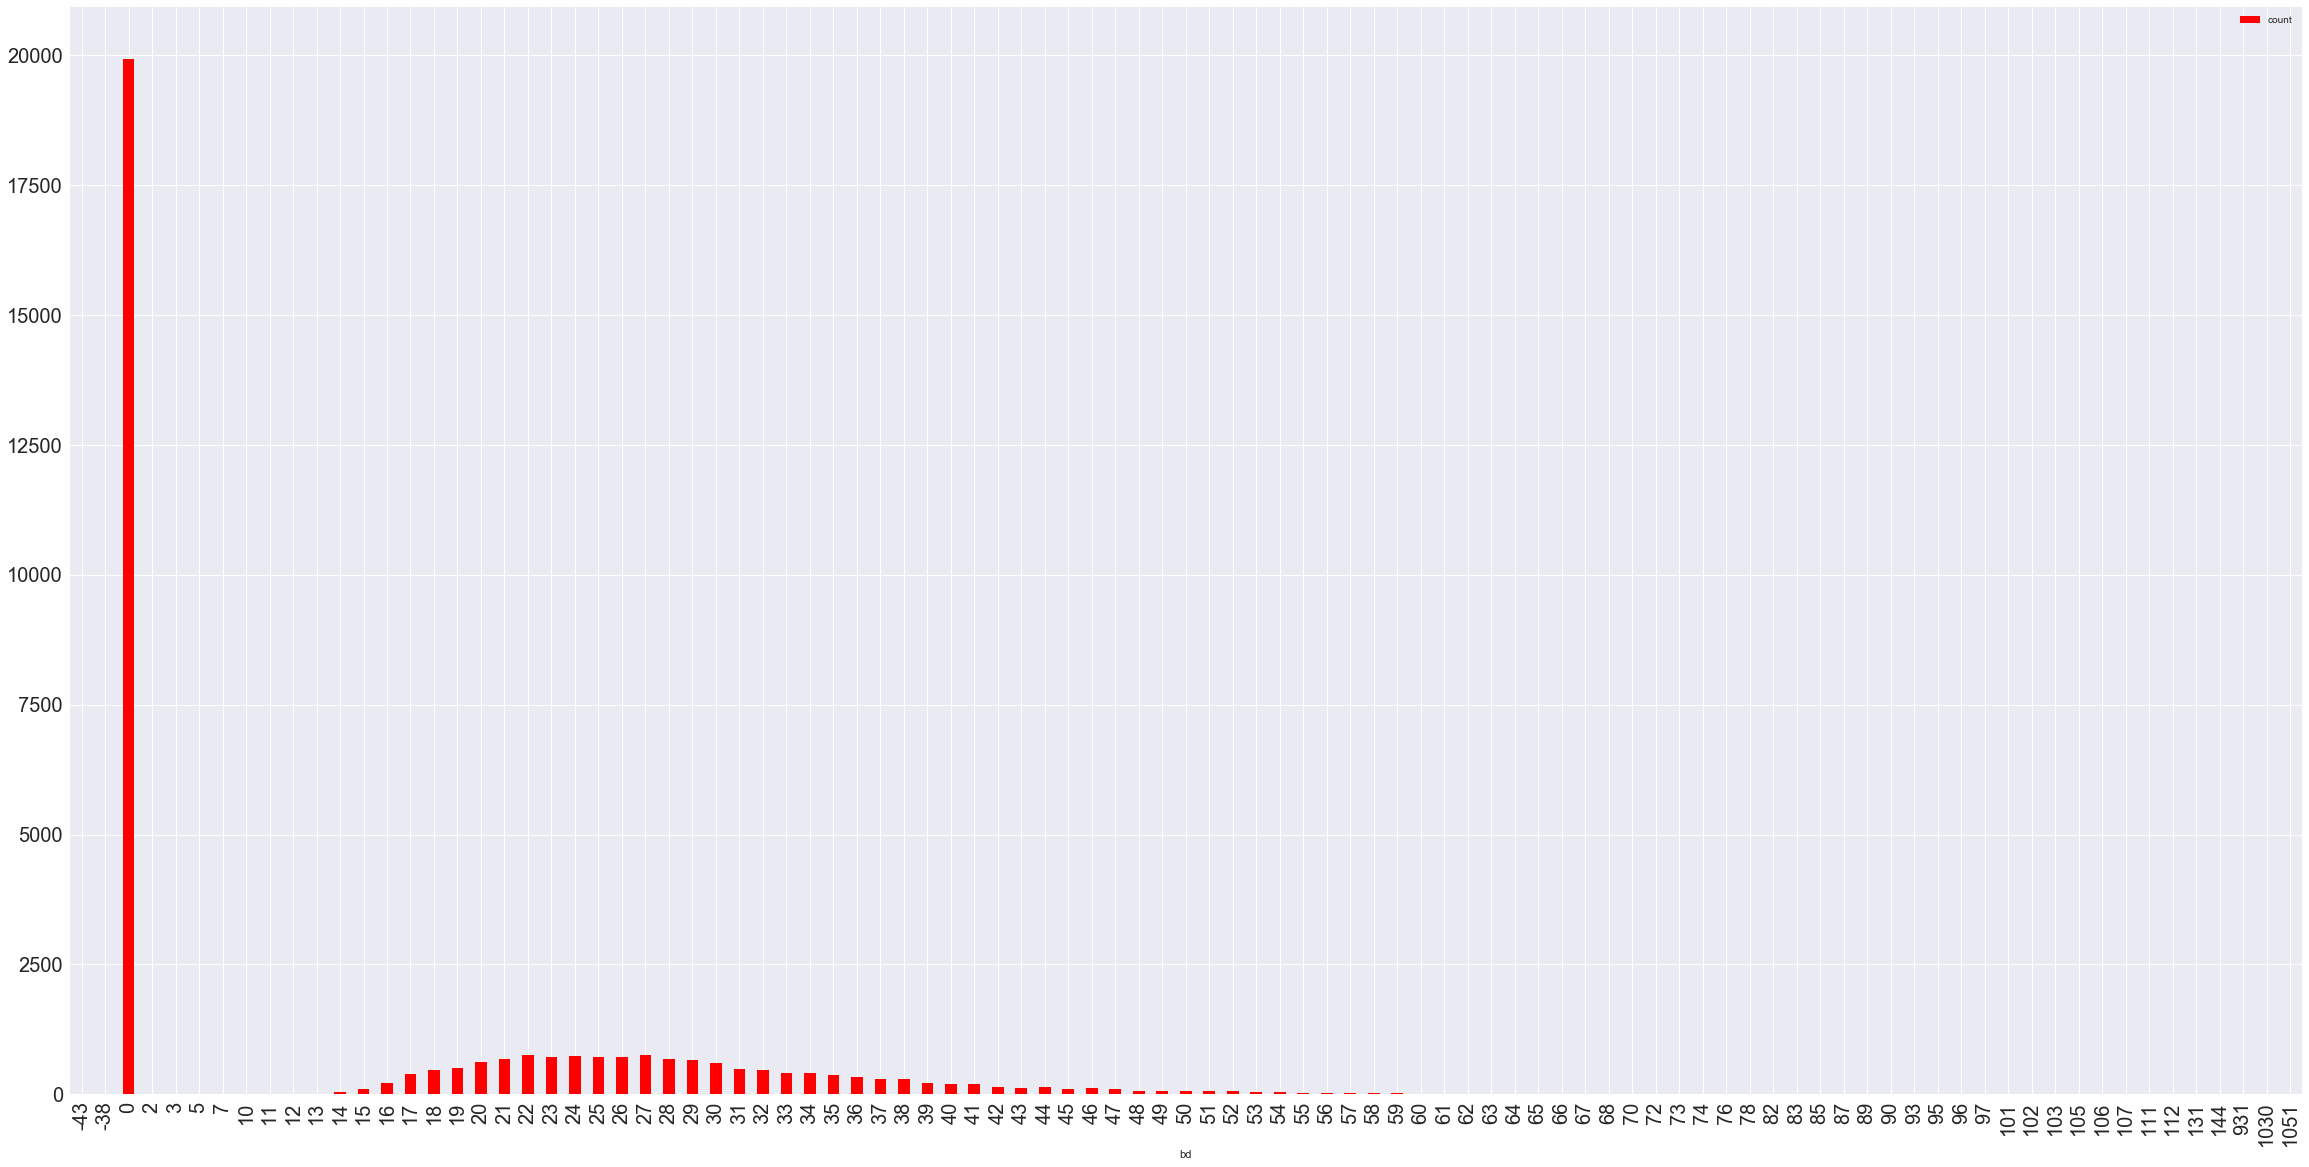

In [126]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
members_bd.plot.bar('bd', 'count', color='r',figsize=(40, 20),fontsize=20)
plt.ylim([0, 1700])
plt.show()

In [152]:
members_bd = members.groupby("bd").size().reset_index(name="count")
members_bd=members_bd[(members_bd['count']>=5)&(members_bd['bd']!=0)]
members_bd

,bd,count
10,13,5
11,14,46
12,15,93
13,16,215
14,17,398
15,18,466
16,19,507
17,20,631
18,21,685
19,22,751


In [102]:
sum(members['city'].isnull())

0

In [32]:
test_mem = pd.merge(test,members, how = 'left' ,on="msno")


In [36]:
test_mem['city'].isnull()

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
2556760    False
2556761    False
2556762    False
2556763    False
2556764    False
2556765    False
2556766    False
2556767    False
2556768    False
2556769    False
2556770    False
2556771    False
2556772    False
2556773    False
2556774    False
2556775    False
2556776    False
2556777    False
2556778    False
2556779    False
2556780    False
2556781    False
2556782    False
2556783    False
2556784    False
2556785    False
2556786    False
2556787    Fal

In [48]:
import numpy as np
members2 = pd.read_csv('members.csv',dtype={'city' : 'category',
                                                      'bd' : np.uint8,
                                                      'gender' : 'category',
                                                      'registered_via' : 'category'})

In [49]:
members2['gender'].cat.categories = range(0,1)

ValueError: new categories need to have the same number of items than the old categories!

In [45]:
members2['gender1'] 

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,0.0,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [60]:
import lightgbm
def ExtraCountry(s):
    return str(s)[0:2]
song_extra = pd.read_csv("song_extra_info.csv")
song_extra['country']=song_extra['isrc'].apply(ExtraCountry)
song_extra


,song_id,name,isrc,country
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043,TW
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015,QM
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303,TW
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446,US
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001,TW
5,QU8f6JR0/cwLGSqJX2XDVzFK0DxMaIUY15ALJXK7ziw=,Our Time,GBAYE1400079,GB
6,O1Oj4CmnZhbHl7oyBaHSpGeu5gvcSmUydY3Awmv3uxk=,癢,HKUM70704066,HK
7,Tr5R61AuEkN8UelOCzu09ZwQi7/HmP9sQmxf9rFngIg=,Aloha| E Komo Mai (Theme Song from Lilo & Stit...,USWD10423930,US
8,ie9l12ZYXEaP4evrBBUvnNnZGdupHSX5NU+tEqB1SDg=,每天愛你多一些,HKA610200010,HK
9,6mICNlckUVGuoK/XGC7bnxXf5s2ZnkpFHShaGL/zM2Y=,你是你的,TWI431000103,TW


In [63]:
#song_extra['country'].drop_duplicates()
song_extra['country'].isnull()

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
2295941    False
2295942    False
2295943    False
2295944    False
2295945    False
2295946    False
2295947    False
2295948    False
2295949    False
2295950    False
2295951    False
2295952    False
2295953    False
2295954    False
2295955    False
2295956    False
2295957    False
2295958    False
2295959    False
2295960    False
2295961    False
2295962    False
2295963    False
2295964    False
2295965    False
2295966    False
2295967    False
2295968    Fal

In [72]:
def isrc_to_year(isrc):
    if type(isrc) == str:
        if int(isrc[5:7]) > 17:
            return int(1900 + int(isrc[5:7]))
        else:
            return int(2000 + int(isrc[5:7]))
    else:
        return 0
song_extra['year'] = song_extra['isrc'].apply(isrc_to_year)

In [73]:
song_extra

,song_id,name,isrc,country,year
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043,TW,2012
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015,QM,2016
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303,TW,2008
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446,US,2013
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001,TW,2013
5,QU8f6JR0/cwLGSqJX2XDVzFK0DxMaIUY15ALJXK7ziw=,Our Time,GBAYE1400079,GB,2014
6,O1Oj4CmnZhbHl7oyBaHSpGeu5gvcSmUydY3Awmv3uxk=,癢,HKUM70704066,HK,2007
7,Tr5R61AuEkN8UelOCzu09ZwQi7/HmP9sQmxf9rFngIg=,Aloha| E Komo Mai (Theme Song from Lilo & Stit...,USWD10423930,US,2004
8,ie9l12ZYXEaP4evrBBUvnNnZGdupHSX5NU+tEqB1SDg=,每天愛你多一些,HKA610200010,HK,2002
9,6mICNlckUVGuoK/XGC7bnxXf5s2ZnkpFHShaGL/zM2Y=,你是你的,TWI431000103,TW,2010


In [89]:
song_full= pd.merge(songs,song_extra,how="left",on="song_id")

In [90]:
song_full['country'] = song_full['country'].fillna(value="na")

In [91]:
sum(song_full['country'].isnull())

0

In [92]:
song_full['year'] = song_full['year'].fillna(value=0)

In [97]:
song_full.to_csv('song_full.csv',sep=',',index=False)